# Scaling

In this exercise you will use estimagic's scaling capabilities to solve a badly scaled optimization problem. 

## Resources:

- [`slice_plot` example](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_visualize_an_optimization_problem.html)
- [how to use scaling](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_scale_optimization_problems.html)

In [1]:
import numpy as np
import estimagic as em

## Get a badly scaled problem from a benchmar set

In [10]:
problem = em.get_benchmark_problems(
    "more_wild", 
    scaling=True,
    scaling_options={"min_scale": 1, "max_scale": 100},
)["chebyquad_6"]

criterion = problem["inputs"]["criterion"]
start_params = problem["inputs"]["params"]
solution = problem["solution"]["value"]


## Task 1: Plotting 

- Use `em.slice_plot` to to visualize `criterion`. Set the lower bounds as `start_params - 1` and the `upper_bounds` as `start_params + 1` and the center at `start_params`. 
- Repeat the plot, but this time use `lower_bounds = start_params - np.abs(0.1 * start_params)` and upper bounds analogously. 
- After looking at the plots, do you think that rescaling the problem with the `start_params` method will help?

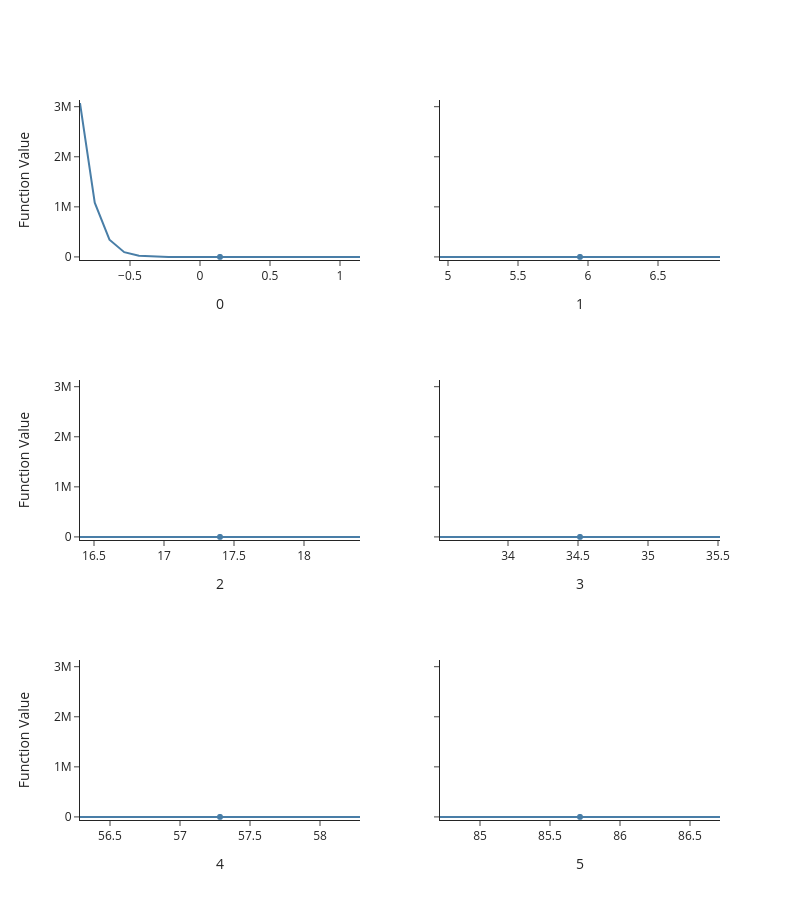

In [12]:
fig = em.slice_plot(func=criterion, lower_bounds=start_params-1, upper_bounds=start_params+1, params=start_params)
fig.show(renderer="png")

## Task 2: Optimization

- Extend the code below by doing an optimization with `scaling=True`.
- Compare the scaled and unscaled optimization in the criterion_plot

In [15]:
algorithm = "nag_pybobyqa"

res_naive = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
)


results = {"naive": res_naive}

em.criterion_plot(results, monotone=True)

In [17]:
algorithm = "nag_pybobyqa"

res_scaled = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
    scaling=True
)


results.update({"scaled": res_scaled})

em.criterion_plot(results, monotone=True)

## Optional tasks

- Try to find an optimizer that is immune to bad scaling, i.e. that behaves almost the same with and without scaling
- Run a benchmark on the badly scaled benchmark set above and compare multiple optimizers

In [36]:
algorithm = "nlopt_neldermead"

res_naive = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
)


results = {"naive": res_naive}

In [37]:
res_scaled = em.minimize(
    criterion,
    start_params,
    algorithm=algorithm,
    scaling=True
)


results.update({"scaled": res_scaled})

em.criterion_plot(results, monotone=True)